In [4]:
# ==============================
# ANALISIS FAMILIAR - ESTUDIANTE B
# ==============================
# Autor: Paula Guevara
# Rol: Especialista en Datos Familiares
# Objetivo: Explorar variables familiares de la encuesta FAC
# ==============================

#py -m pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# base de datos
df = pd.read_excel("C:/Users/User/Downloads/Base quitando faltantes.xlsx")


print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}\n")

# variables
print("=== VARIABLES Y TIPOS DE DATO ===")
variables_info = pd.DataFrame({
    "Variable": df.columns,
    "Tipo de Dato": df.dtypes.astype(str).values
})
print(variables_info.to_string(index=False), "\n")

=== INFORMACIÓN GENERAL ===
Total de registros: 5931
Total de columnas: 16

=== VARIABLES Y TIPOS DE DATO ===
                       Variable Tipo de Dato
                          EDAD2        int64
                           SEXO       object
 FRECUENCIA_VISITA_FAMILIAR...3       object
                   ESTADO_CIVIL       object
                          HIJOS       object
                   NUMERO_HIJOS        int64
                 HIJOS_EN_HOGAR        int64
                 RELACION_HIJOS       object
                       HERMANOS       object
          ESPECIFICACION_CASADO       object
          CASADO_FUERZA_MILITAR       object
           TIPO_RELACION_PAREJA       object
        RELACION_PAREJA_ESTABLE       object
   PRINCIPAL_NECESIDAD_FAMILIAR       object
         MALTRATO_INTRAFAMILIAR       object
FRECUENCIA_VISITA_FAMILIAR...17       object 



=== ANÁLISIS ESTADO CIVIL ===
ESTADO_CIVIL
casado        3485
soltero/a     2026
divorciado     239
separado       147
viudo/a         34
Name: count, dtype: int64

 Porcentaje de personal casado: 58.76%



C:\Users\User\AppData\Local\Temp\ipykernel_18060\2455905527.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="ESTADO_CIVIL", order=estado_civil_counts.index, palette="Set2")


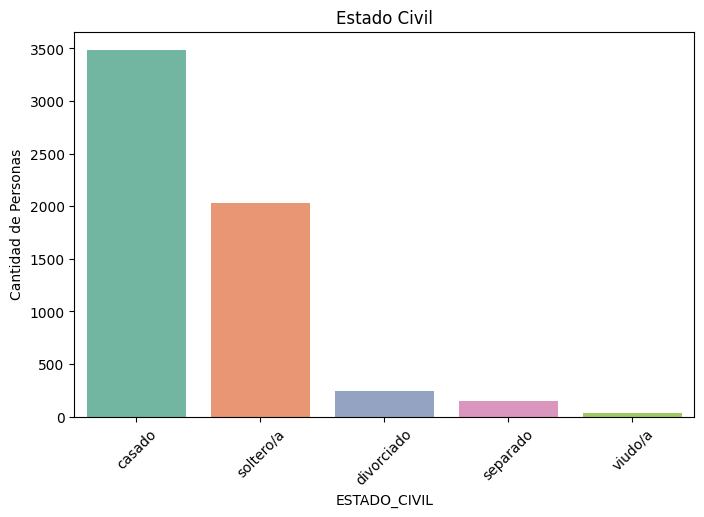

In [31]:
# ANÁLISIS ESTADO CIVIL
print("=== ANÁLISIS ESTADO CIVIL ===")
estado_civil_counts = df["ESTADO_CIVIL"].value_counts(dropna=False)
print(estado_civil_counts)

# Porcentaje casados
if "CASADO" in estado_civil_counts.index or "casado" in estado_civil_counts.index:
    casados = estado_civil_counts.get("CASADO", 0) + estado_civil_counts.get("casado", 0)
    porcentaje_casados = (casados / len(df)) * 100
    print(f"\n Porcentaje de personal casado: {porcentaje_casados:.2f}%\n")

# Gráfico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ESTADO_CIVIL", order=estado_civil_counts.index, palette="Set2")
plt.title("Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.show()

=== RELACIÓN EDAD - ESTADO CIVIL ===


C:\Users\User\AppData\Local\Temp\ipykernel_14384\3969647837.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ESTADO_CIVIL", y="EDAD2", palette="Pastel1")


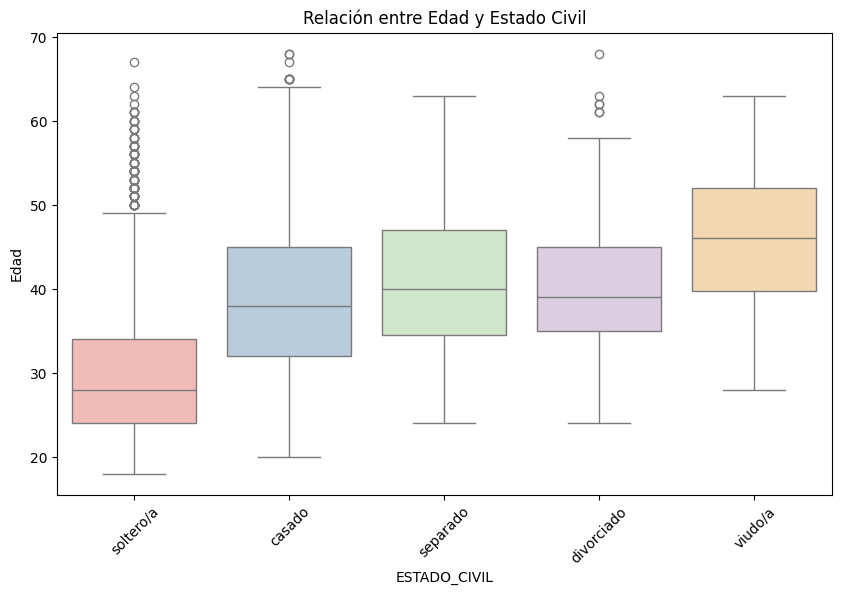

Edad promedio por estado civil:
ESTADO_CIVIL
casado        39
divorciado    40
separado      41
soltero/a     30
viudo/a       47
Name: EDAD2, dtype: int64 



In [10]:
print("=== RELACIÓN EDAD - ESTADO CIVIL ===")

if "EDAD2" in df.columns:
    # Redondear la edad a enteros
    df["EDAD2"] = df["EDAD2"].round(0).astype(int)

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="ESTADO_CIVIL", y="EDAD2", palette="Pastel1")
    plt.title("Relación entre Edad y Estado Civil")
    plt.xticks(rotation=45)
    plt.ylabel("Edad")
    plt.show()

    # Edad promedio por estado civil
    edad_promedio = df.groupby("ESTADO_CIVIL")["EDAD2"].mean().round(0).astype(int)
    print("Edad promedio por estado civil:")
    print(edad_promedio, "\n")


C:\Users\User\AppData\Local\Temp\ipykernel_14384\4195629499.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="ESTADO_CIVIL", y="EDAD2", estimator="mean", ci=None, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_14384\4195629499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ESTADO_CIVIL", y="EDAD2", estimator="mean", ci=None, palette="Set2")


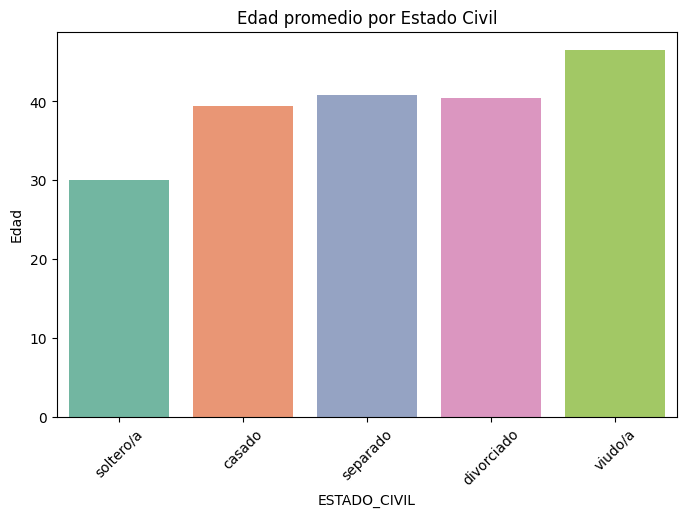

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="ESTADO_CIVIL", y="EDAD2", estimator="mean", ci=None, palette="Set2")
plt.title("Edad promedio por Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Edad")
plt.show()

In [13]:
# ANÁLISIS DE HIJOS
print("=== ANÁLISIS DE HIJOS ===")
print(df["HIJOS"].value_counts(dropna=False))


=== ANÁLISIS DE HIJOS ===
HIJOS
si    3181
no    2750
Name: count, dtype: int64


=== PATRONES FAMILIARES ===
Número de hijos mas frecuente: 1



C:\Users\User\AppData\Local\Temp\ipykernel_14384\1482164117.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NUMERO_HIJOS", data=df_hijos, palette="Set2")


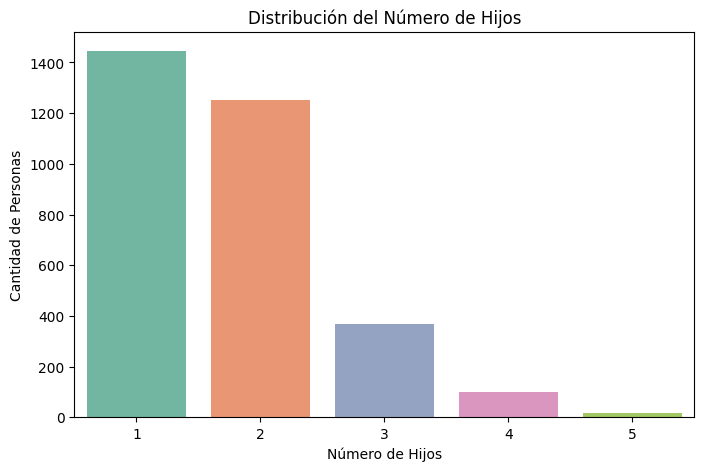

In [17]:
print("=== PATRONES FAMILIARES ===")

# Solo las personas que SÍ tienen hijos
if "HIJOS" in df.columns and "NUMERO_HIJOS" in df.columns:
    df_hijos = df[(df["HIJOS"] == "si") & (df["NUMERO_HIJOS"].notna())]

    if not df_hijos.empty:
        # Moda en lugar de promedio
        moda_hijos = df_hijos["NUMERO_HIJOS"].mode().iloc[0]
        print(f"Número de hijos mas frecuente: {moda_hijos}\n")

        # Distribución del número de hijos
        plt.figure(figsize=(8, 5))
        sns.countplot(x="NUMERO_HIJOS", data=df_hijos, palette="Set2")
        plt.title("Distribución del Número de Hijos")
        plt.xlabel("Número de Hijos")
        plt.ylabel("Cantidad de Personas")
        plt.show()


=== INFORMACIÓN SOBRE PERSONAS CON HIJOS ===
Total personas con hijos: 3181
=== TABLA CRUZADA: NÚMERO DE HIJOS vs HIJOS EN EL HOGAR ===
HIJOS_EN_HOGAR    0     1    2    3   4  5
NUMERO_HIJOS                              
1               281  1154    8    1   0  3
2               128   254  867    1   1  0
3                48    89  118  112   0  0
4                14    29   25   16  14  0
5                 4     7    3    3   1  0 

=== RELACIÓN CON LOS HIJOS ===
RELACION_HIJOS
cercana                  95.504558
cercana con conflicto     2.043383
distante                  1.791889
otro                      0.565860
conflictiva               0.094310
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_14384\4251154473.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_hijos, x="RELACION_HIJOS", palette="Set2",


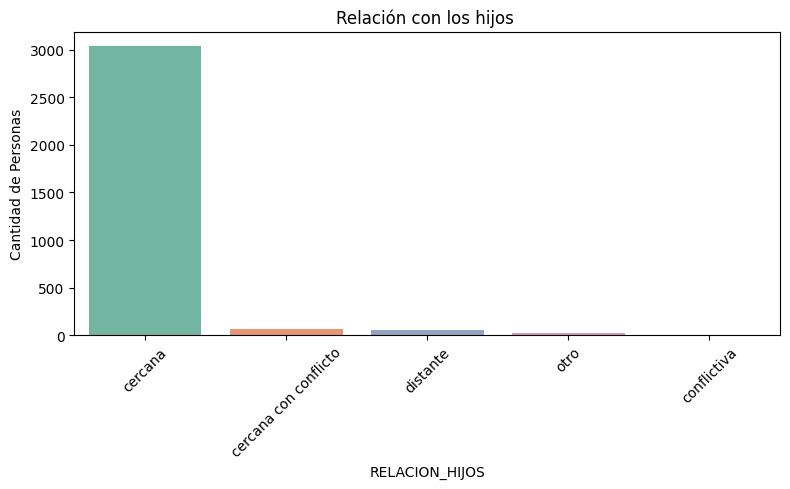

=== TABLA CRUZADA: RELACIÓN CON LOS HIJOS vs HIJOS EN EL HOGAR ===
HIJOS_EN_HOGAR           0     1    2    3   4  5
RELACION_HIJOS                                   
cercana                408  1486  998  127  16  3
cercana con conflicto   13    29   17    6   0  0
conflictiva              0     3    0    0   0  0
distante                46     6    5    0   0  0
otro                     8     9    1    0   0  0 



In [24]:

df_hijos = df[df["HIJOS"] == "si"].copy()

print("=== INFORMACIÓN SOBRE PERSONAS CON HIJOS ===")
print(f"Total personas con hijos: {len(df_hijos)}")

# Tabla cruzada: Número de hijos vs Hijos en el hogar

tabla_hogar = pd.crosstab(df_hijos["NUMERO_HIJOS"], df_hijos["HIJOS_EN_HOGAR"])
print("=== TABLA CRUZADA: NÚMERO DE HIJOS vs HIJOS EN EL HOGAR ===")
print(tabla_hogar, "\n")

# Relación con los hijos

print("=== RELACIÓN CON LOS HIJOS ===")
print(df_hijos["RELACION_HIJOS"].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_hijos, x="RELACION_HIJOS", palette="Set2",
              order=df_hijos["RELACION_HIJOS"].value_counts().index)
plt.title("Relación con los hijos ")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================
# Tabla cruzada: Relación con hijos vs Número de hijos en el hogar
# ==============================
tabla_relacion = pd.crosstab(df_hijos["RELACION_HIJOS"], df_hijos["HIJOS_EN_HOGAR"])
print("=== TABLA CRUZADA: RELACIÓN CON LOS HIJOS vs HIJOS EN EL HOGAR ===")
print(tabla_relacion, "\n")


=== TABLA CRUZADA: RELACIÓN DE PAREJA ESTABLE vs TIPO DE RELACIÓN vs NECESIDAD FAMILIAR ===
PRINCIPAL_NECESIDAD_FAMILIAR                    acompanamiento psicosocial  \
RELACION_PAREJA_ESTABLE TIPO_RELACION_PAREJA                                 
no                      no responde                                     42   
si                      cercana                                         48   
                        cercana con conflicto                           11   
                        conflictiva - agresion                           0   
                        distante                                         4   
                        no aplica                                        1   
Total                                                                  106   

PRINCIPAL_NECESIDAD_FAMILIAR                    economia  \
RELACION_PAREJA_ESTABLE TIPO_RELACION_PAREJA               
no                      no responde                  459   
si                      c

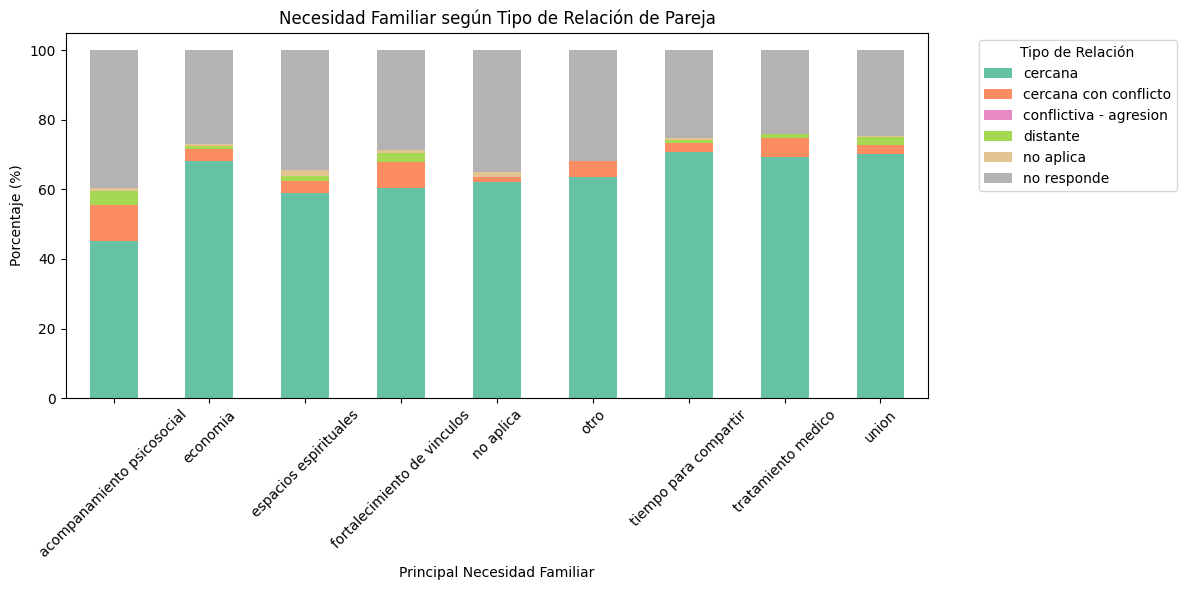

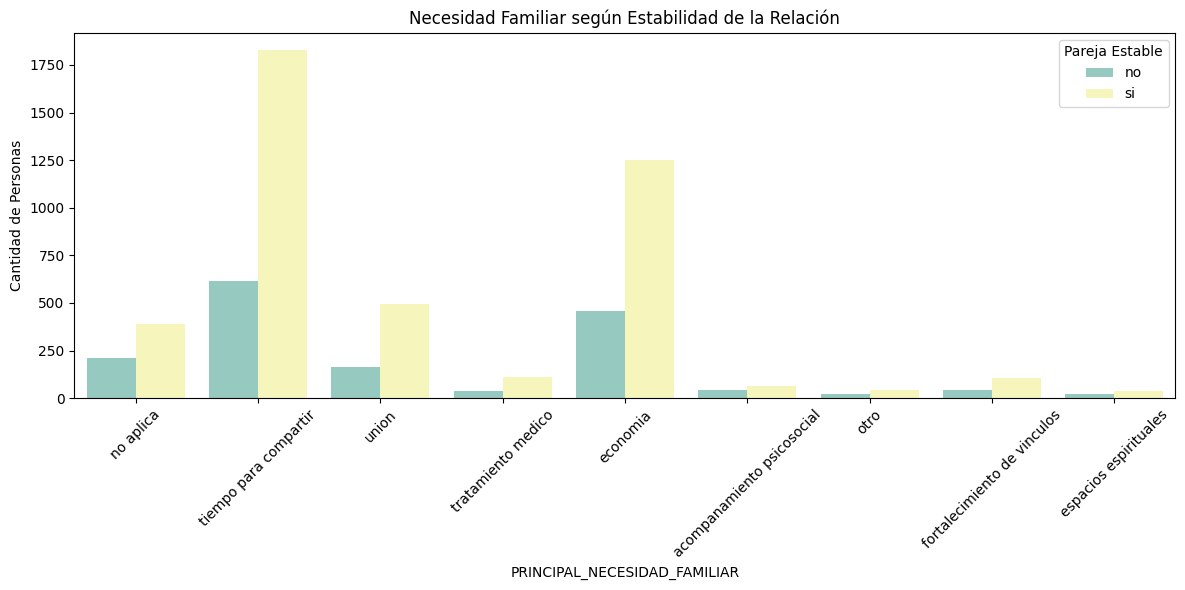

In [36]:
# TABLA CRUZADA
print("=== TABLA CRUZADA: RELACIÓN DE PAREJA ESTABLE vs TIPO DE RELACIÓN vs NECESIDAD FAMILIAR ===")
tabla = pd.crosstab(
    index=[df["RELACION_PAREJA_ESTABLE"], df["TIPO_RELACION_PAREJA"]],
    columns=df["PRINCIPAL_NECESIDAD_FAMILIAR"],
    margins=True, margins_name="Total"
)
print(tabla, "\n")




tabla = pd.crosstab(df["PRINCIPAL_NECESIDAD_FAMILIAR"], 
                    df["TIPO_RELACION_PAREJA"], 
                    normalize="index") * 100

# Gráfico de barras apiladas
tabla.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")

plt.title("Necesidad Familiar según Tipo de Relación de Pareja")
plt.xlabel("Principal Necesidad Familiar")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Relación", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



# Necesidad familiar según estabilidad de pareja

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="PRINCIPAL_NECESIDAD_FAMILIAR", hue="RELACION_PAREJA_ESTABLE", palette="Set3")
plt.title("Necesidad Familiar según Estabilidad de la Relación")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Pareja Estable")
plt.tight_layout()
plt.show()


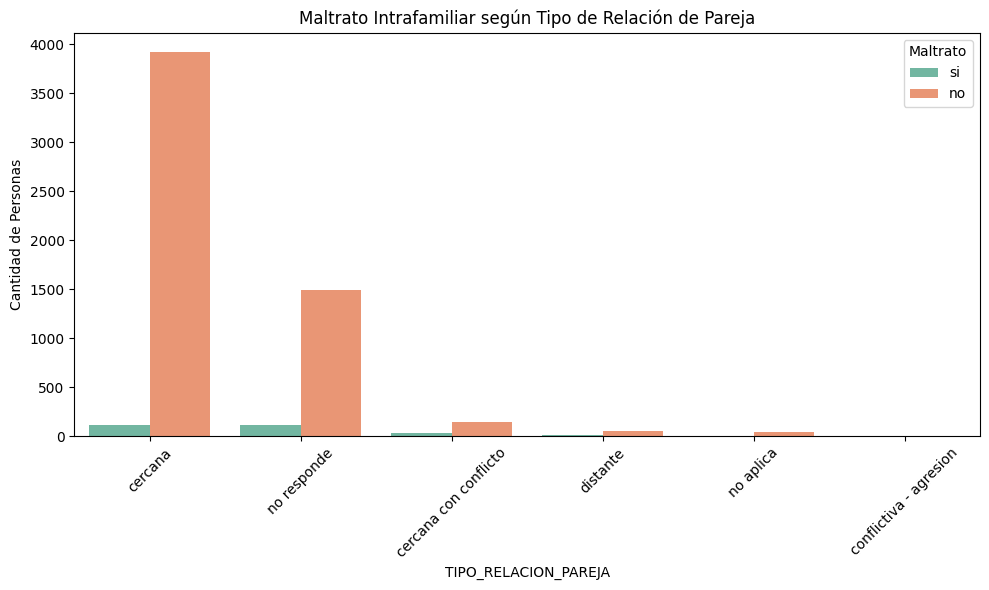

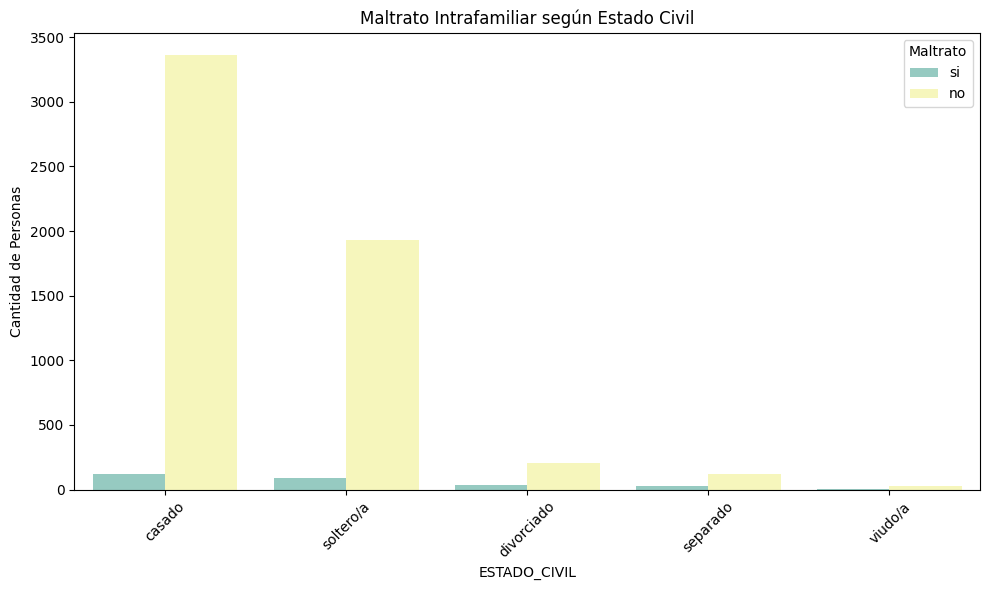

=== PORCENTAJE DE MALTRATO POR TIPO DE RELACIÓN Y ESTADO CIVIL ===
MALTRATO_INTRAFAMILIAR                  no     si
TIPO_RELACION_PAREJA   ESTADO_CIVIL              
cercana                casado         97.7    2.3
                       divorciado     91.8    8.2
                       separado       92.1    7.9
                       soltero/a      95.6    4.4
                       viudo/a        87.5   12.5
cercana con conflicto  casado         79.3   20.7
                       divorciado     50.0   50.0
                       separado      100.0    0.0
                       soltero/a      95.8    4.2
conflictiva - agresion casado          0.0  100.0
                       divorciado    100.0    0.0
distante               casado         88.6   11.4
                       divorciado    100.0    0.0
                       separado      100.0    0.0
                       soltero/a      88.9   11.1
no aplica              casado        100.0    0.0
                       divorciado

In [29]:
# GRÁFICO 1: Maltrato según tipo de relación

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="TIPO_RELACION_PAREJA", hue="MALTRATO_INTRAFAMILIAR", palette="Set2",
              order=df["TIPO_RELACION_PAREJA"].value_counts().index)
plt.title("Maltrato Intrafamiliar según Tipo de Relación de Pareja")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()


# GRÁFICO 2: Maltrato según estado civil

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="ESTADO_CIVIL", hue="MALTRATO_INTRAFAMILIAR", palette="Set3",
              order=df["ESTADO_CIVIL"].value_counts().index)
plt.title("Maltrato Intrafamiliar según Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()

# PORCENTAJES

tabla_pct = pd.crosstab(
    index=[df["TIPO_RELACION_PAREJA"], df["ESTADO_CIVIL"]],
    columns=df["MALTRATO_INTRAFAMILIAR"],
    normalize="index"
) * 100

print("=== PORCENTAJE DE MALTRATO POR TIPO DE RELACIÓN Y ESTADO CIVIL ===")
print(tabla_pct.round(1), "\n")


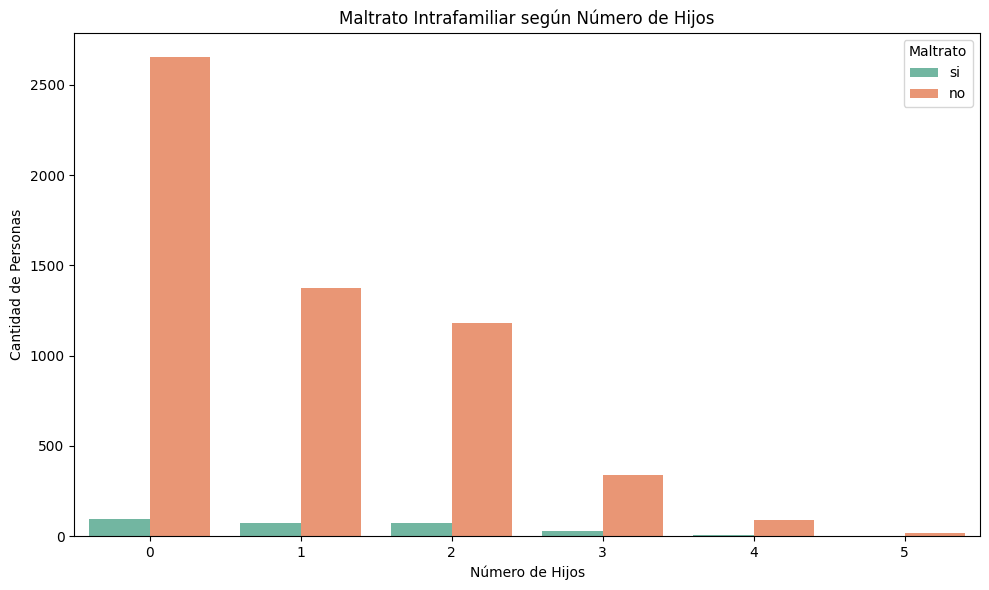

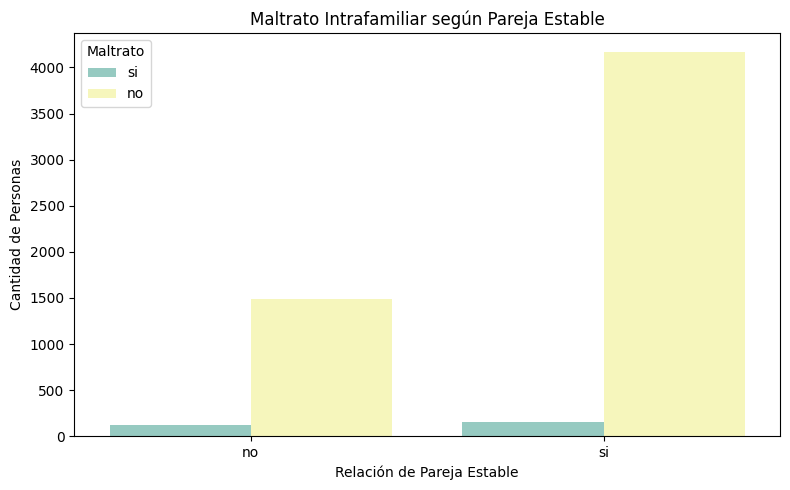

=== TABLA CRUZADA: MALTRATO vs PAREJA ESTABLE vs NÚMERO DE HIJOS ===
MALTRATO_INTRAFAMILIAR                  no   si  Total
RELACION_PAREJA_ESTABLE NUMERO_HIJOS                  
no                      0             1080   45   1125
                        1              243   41    284
                        2              114   22    136
                        3               36    7     43
                        4               14    2     16
                        5                2    0      2
si                      0             1576   49   1625
                        1             1133   30   1163
                        2             1065   50   1115
                        3              302   22    324
                        4               76    6     82
                        5               15    1     16
Total                                 5656  275   5931 

=== PORCENTAJE DE MALTRATO POR NÚMERO DE HIJOS Y PAREJA ESTABLE ===
MALTRATO_INTRAFAMILIAR              

In [32]:
# GRÁFICO 1: Maltrato según número de hijos

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="NUMERO_HIJOS", hue="MALTRATO_INTRAFAMILIAR", palette="Set2")
plt.title("Maltrato Intrafamiliar según Número de Hijos")
plt.xlabel("Número de Hijos")
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()

# GRÁFICO 2: Maltrato según pareja estable

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="RELACION_PAREJA_ESTABLE", hue="MALTRATO_INTRAFAMILIAR", palette="Set3")
plt.title("Maltrato Intrafamiliar según Pareja Estable")
plt.xlabel("Relación de Pareja Estable")
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()

# TABLA CRUZADA
print("=== TABLA CRUZADA: MALTRATO vs PAREJA ESTABLE vs NÚMERO DE HIJOS ===")
tabla = pd.crosstab(
    index=[df["RELACION_PAREJA_ESTABLE"], df["NUMERO_HIJOS"]],
    columns=df["MALTRATO_INTRAFAMILIAR"],
    margins=True, margins_name="Total"
)
print(tabla, "\n")

# PORCENTAJES 
tabla_pct = pd.crosstab(
    index=[df["RELACION_PAREJA_ESTABLE"], df["NUMERO_HIJOS"]],
    columns=df["MALTRATO_INTRAFAMILIAR"],
    normalize="index"
) * 100

print("=== PORCENTAJE DE MALTRATO POR NÚMERO DE HIJOS Y PAREJA ESTABLE ===")
print(tabla_pct.round(1), "\n")


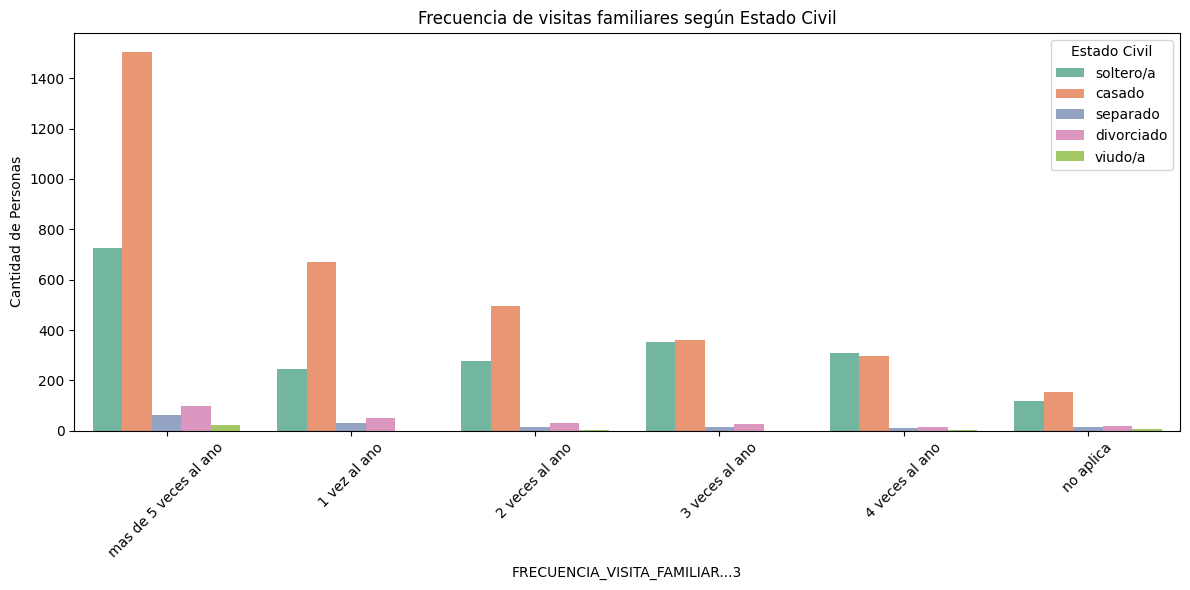

In [35]:
# GRÁFICO DE BARRAS

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="FRECUENCIA_VISITA_FAMILIAR...3",
    hue="ESTADO_CIVIL",
    palette="Set2",
    order=df["FRECUENCIA_VISITA_FAMILIAR...3"].value_counts().index
)
plt.title("Frecuencia de visitas familiares según Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Estado Civil")
plt.tight_layout()
plt.show()
